# Decision Tree

### 1. Use Python to build a decision tree

In [1]:
# import required libraries
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [2]:
# read the csv file
customers_df = pd.read_csv('customers_iphone.csv')

In [3]:
customers_df

,Customer ID,Student,Credit Rating,Class: Buy iPhone
0,1,Yes,Good,Yes
1,2,No,Poor,No
2,3,Yes,Poor,Yes
3,4,No,Poor,No
4,5,Yes,Poor,No
5,6,Yes,Good,Yes
6,7,No,Good,No
7,8,No,Good,Yes
8,9,No,Good,Yes
9,10,Yes,Poor,No


In [4]:
# drop Customer ID column
customers_df.drop('Customer ID', axis=1, inplace=True)

In [5]:
customers_df

,Student,Credit Rating,Class: Buy iPhone
0,Yes,Good,Yes
1,No,Poor,No
2,Yes,Poor,Yes
3,No,Poor,No
4,Yes,Poor,No
5,Yes,Good,Yes
6,No,Good,No
7,No,Good,Yes
8,No,Good,Yes
9,Yes,Poor,No


In [6]:
# replace categorical values with numerical values
customers_df['Student'] = customers_df['Student'].replace({'Yes': 1, 'No': 0})
customers_df['Credit Rating'] = customers_df['Credit Rating'].replace({'Good': 1, 'Poor': 0})

customers_df

,Student,Credit Rating,Class: Buy iPhone
0,1,1,Yes
1,0,0,No
2,1,0,Yes
3,0,0,No
4,1,0,No
5,1,1,Yes
6,0,1,No
7,0,1,Yes
8,0,1,Yes
9,1,0,No


Classes: No, Yes


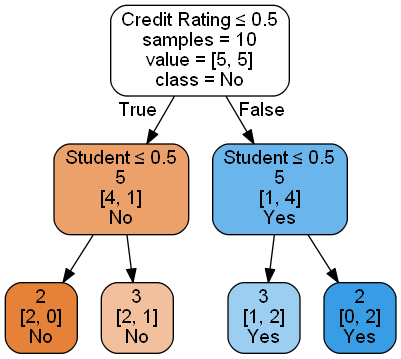

In [7]:
# decision tree
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(customers_df.drop(columns=['Class: Buy iPhone']), customers_df['Class: Buy iPhone'])

print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=customers_df.columns[:2], class_names=classTree.classes_)

### 2. 

Build a decision tree classifier

Requirement: 
1.	Using 30% of the data as testing data
2.	Display the  confusion matrix of both training data and testing data
3.	Find a good, non-overfitting tree with reasonable parameters and preformance.

This data description is in the file `spambaseDOCUMENTATION.txt`

In [8]:
# read the csv file
spambase_df = pd.read_csv('Spambase.csv')

In [9]:
spambase_df

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [10]:
# replace values in Spam column with categorical data
spambase_df['Spam'] = spambase_df['Spam'].replace({1: 'Yes', 0: 'No'})

spambase_df

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,Yes
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,Yes
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,Yes
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,Yes
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,No
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,No
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,No
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,No


Classes: No, Yes


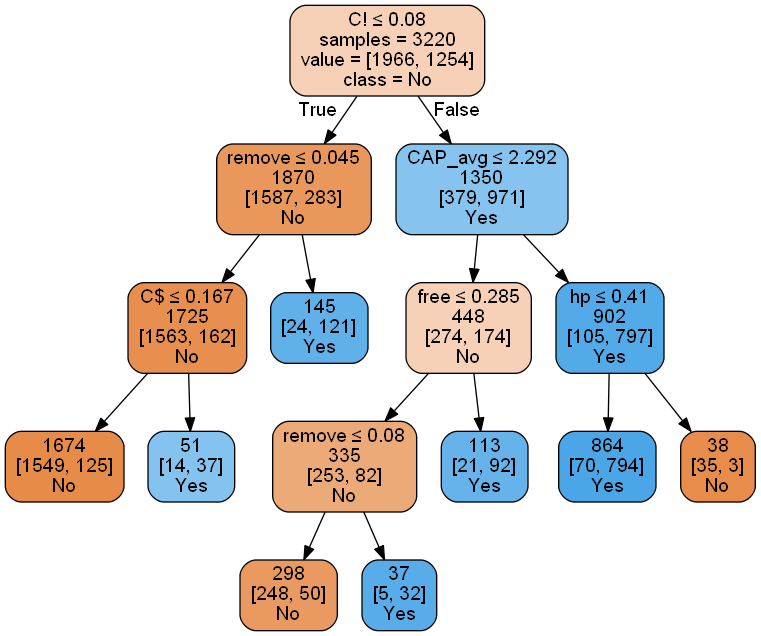

In [11]:
X = spambase_df.drop(columns=['Spam'])
y = spambase_df['Spam']

# set test size as 30%
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=0)

# train decision tree classifier
ClassTree = DecisionTreeClassifier(min_impurity_decrease=0.009)
ClassTree.fit(train_X, train_y)

# plot decision tree
print("Classes: {}".format(', '.join(ClassTree.classes_)))
plotDecisionTree(ClassTree, feature_names=train_X.columns, class_names=ClassTree.classes_)

In [12]:
# confusion matrix
classificationSummary(train_y, ClassTree.predict(train_X))
classificationSummary(valid_y, ClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9031)

       Prediction
Actual    0    1
     0 1832  134
     1  178 1076
Confusion Matrix (Accuracy 0.8849)

       Prediction
Actual   0   1
     0 766  56
     1 103 456


After some testing and trials, it appears that the parameter `min_impurity_decrease=0.009` is the most optimal one that gives us the highest accuracy while avoiding the overfitting problem.

The difference in Accuracy between Testing and Training data is `0.0182`.